# KEN1435 - Principles of Data Science | Homework Assignment 3 (HA3) :  Societal Mood

For this assignment, we will reconsider the data set that is extracted from social media. As previously introduced, it covers a collection of users on social media that were retrieved based on posts that referenced a list of keywords related to the COVID-19 pandemic. Among all messages acquired with these keywords, those users were extacted that indicated their location was a city in the Netherlands. Specifically, we take a look at the accounts that specified "Maastricht" as their location.

First we load the necessary python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
# Added for prettier plots
import seaborn as sns
tab10 = plt.get_cmap("tab10").colors

### Exercise 1. (*1pt*)
Load the data set as provided in the files `users_HA3.tsv` and `tweets_HA3.tsv` into the variables `users` and `tweets`, respectively. Make sure that you convert the times at which the tweets are created from strings into a usable format.

#### Solution

In [2]:
users = pd.read_csv("users_HA3.tsv", sep="\t")
tweets = pd.read_csv("tweets_HA3.tsv", sep= "\t")
users

,Unnamed: 0,gender,gender.1,twitter,twitter.1
0,NaN,male,female,followers,friends
1,user_id,NaN,NaN,NaN,NaN
2,043u0001,0.9428,0.0572,733,894
3,043u0003,0.9649,0.0351,92,647
4,043u0006,0.7454,0.2546,276,278
5,043u0015,0.0009,0.9991,8576,5726
6,043u0016,0.0073,0.9927,42,382
7,043u0017,0.9971,0.0029,699,1130
8,043u0018,1.0,0.0,737,666
9,043u0019,0.9953,0.0047,1344,1165


## Differences between male and female accounts
When processing the accounts that were collected in the data gathering phase, the researchers also analyzed the profile pages of the accounts using a gender classifier. The file `users_HA3.tsv` contains the outcomes of this classification. For each account, the classifier outputs a probability that an account would be classified with either label.

The researchers want to analyze the difference in expressed mood between male and female accounts. They decide that they will use a cut-off at a probability of `0.8` as an inclusion criterium. So if an account scores more than `0.8` on either male or female probability, it is included in that group for further analysis.

### Exercise 2. (*3pt*)
Visualize the ANEW Valence distribution of all tweets from the accounts that are classified as male and female.

#### Solution

Merging was done with the help of AI (GitHub Copilot)
Note: For me it makes more sense to call it "target audiences" since it is their followers and not the people managing the accounts

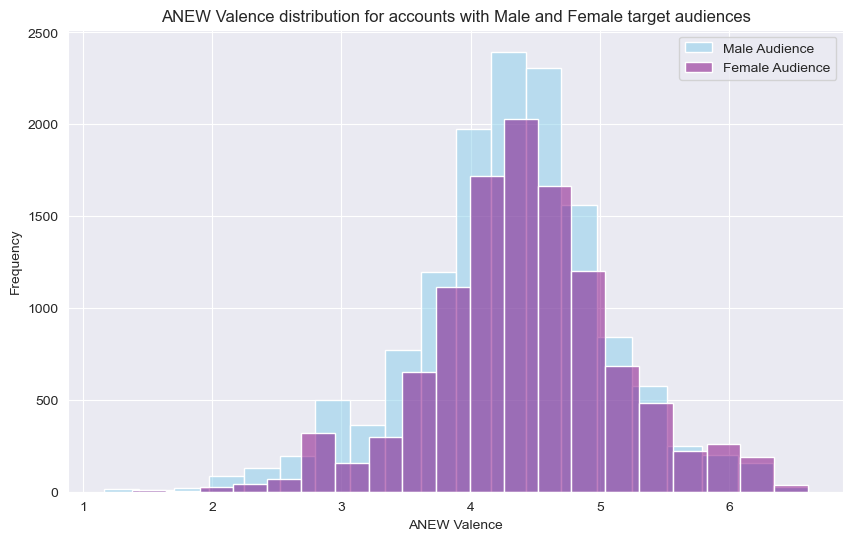

In [30]:
users = users.iloc[2:]

users["gender"] = users["gender"].astype(float)

users["gender.1"] = users["gender.1"].astype(float)

male_users = users[users["gender"] > 0.8]
female_users = users[users["gender.1"] > 0.8]

male_tweets = pd.merge(male_users, tweets, left_on="Unnamed: 0", right_on="user_id")

female_tweets = pd.merge(female_users, tweets, left_on="Unnamed: 0", right_on="user_id")

plt.figure(figsize=(10,6))
sns.histplot(male_tweets["ANEW_Valence"], bins=20, label = "Male Audience", color = "skyblue", alpha = 0.5)
sns.histplot(female_tweets["ANEW_Valence"], bins = 20, label = "Female Audience", color = "purple", alpha = 0.5)
plt.title("ANEW Valence distribution for accounts with Male and Female target audiences")
plt.xlabel("ANEW Valence")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Based on the visual comparison above, the researchers want to determine whether the male and female averages align. Therefore, they run a one sided statistical test.

### Exercise 3. (*2pt*)
Denote the null-hypothesis and alternative hypothesis for this test.

#### Solution

- $H_0$ (null-hypothesis): The averages *do* align. There is no difference between the average ANEW_Valence score bewteen male and female audiences
- $H_a$ (alternative hypothesis): The averages are different, specifically since a one-sided test is being run. The test could test, whether the average ANEW_Valence score for male audiences is bigger than that of female audiences

Suppose that we may assume that the average ANEW Valence score for female accounts follows a normal distribution. We determine the mean and standard deviation of the distribution directly from the data.

### Exercise 4. (*2pt*)
Determine the value of the test-statistic and the $P$-value.

#### Solution

Test was written with the help of Copilot

In [13]:
spots = users["gender"]
observed = np.mean(spots)
expected = 0.5
spo_mean = spots.mean()
variance = ((spots - spo_mean)**2).sum() / spots.size
sd = np.sqrt(variance)
se = np.sqrt(len(spots)) * sd
test_statistic = (observed - expected) / se

p_value = norm.cdf(test_statistic)
p_value


0.5250498990274612

## Response to COVID-19
To assess each accounts reaction to the start of the COVID-19 pandemic, we will investigate the difference the average ANEW Valence in the month before the first COVID-19 case was observed in the Netherlands (i.e., December 2019) and a month after (i.e., March 2020).

### Exercise 5. (*2pt*)
Which accounts have the biggest and lowest difference in average ANEW Valence across these two months?

#### Solution

I will take the months february and march as the two months, since december 2019 is *not* one month before march 2020

In [22]:
tweets["created_at"] = pd.to_datetime(tweets["created_at"])

feb_users = tweets[(tweets["created_at"].dt.month == 2) & (tweets["created_at"].dt.year == 2020)]
mar_users = tweets[(tweets["created_at"].dt.month == 3) & (tweets["created_at"].dt.year == 2020)]

feb_valence_user = feb_users.groupby("user_id")["ANEW_Valence"].mean()
mar_valence_user = mar_users.groupby("user_id")["ANEW_Valence"].mean()

valence_difference = feb_valence_user - mar_valence_user

max_dif = valence_difference.idxmax()
min_dif = valence_difference.idxmin()

max_dif, min_dif

('043u0029', '043u0025')

Here with the requested months (december and march)

In [24]:
tweets["created_at"] = pd.to_datetime(tweets["created_at"])

dec_users = tweets[(tweets["created_at"].dt.month == 12) & (tweets["created_at"].dt.year == 2019)]
mar_users = tweets[(tweets["created_at"].dt.month == 3) & (tweets["created_at"].dt.year == 2020)]

dec_valence_user = feb_users.groupby("user_id")["ANEW_Valence"].mean()
mar_valence_user = mar_users.groupby("user_id")["ANEW_Valence"].mean()

valence_difference = dec_valence_user - mar_valence_user

max_dif = valence_difference.idxmax()
min_dif = valence_difference.idxmin()

max_dif, min_dif


('043u0021', '043u0063')

ValueError: Could not interpret value `ANEW_Valence` for parameter `y`